In [1]:
#Se importan librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets


## Lee la data

In [2]:
corazon = pd.read_csv('heart.csv')
corazon.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### age => años de edad
##### sex => (1 = male; 0 = female)
##### cp => tipo de dolor en el pecho
##### trestbps => presión arterial en reposo (en mm Hg al ingreso al hospital)
##### chol => suero colestoral en mg / dl
##### fbs => (azúcar en sangre en ayunas> 120 mg / dl) (1 = verdadero; 0 = falso)
##### restecg => Resultados electrocardiográficos en reposo
##### thalach => frecuencia cardíaca máxima alcanzada
##### exang => angina inducida por ejercicio (1 = sí; 0 = no)
##### oldpeak => Depresión del ST inducida por el ejercicio relativo al descanso
##### slope => la pendiente del segmento ST del ejercicio máximo
##### ca => número de buques principales (0-3) coloreados por la flotación
##### thal => 3 = normal; 6 = fixed defect; 7 = reversable defect
##### target =>  diagnóstico de enfermedad cardíaca (estado de la enfermedad angiográfica)
#### -- Valor 0: <50% de reducción de diámetro
#### -- Valor 1: > 50% de estrechamiento del diámetro 

## Transforma la data para que coincida con los tipos

In [3]:
target = pd.DataFrame(corazon['target'])
dataframe = corazon.drop(['target'], axis=1)

In [4]:
lista = []
for i in target['target']:
    lista.append(int(i))
    
objetivo = np.array(lista)

#dataframe ---> data
#objetivo ---->resultado esperado

# Arboles de decision

In [5]:
# Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

ad = DecisionTreeClassifier(criterion='entropy', max_depth=10) # Creando el modelo
ad.fit(dataframe, target) # Ajustando el modelo

#generando archivo para graficar el arbol
with open("mi_arbol.dot", 'w') as archivo_dot:
    tree.export_graphviz(ad, out_file = archivo_dot)

In [6]:
from graphviz import Digraph
# utilizando el lenguaje dot para graficar el arbol.
!dot -Tjpeg mi_arbol.dot -o arbol_decision1.jpeg

In [7]:
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((objetivo == ad.predict(dataframe)).mean()))

precisión del modelo:  1.00


## Crean datos de test y entrenamiento

In [8]:
train, test = train_test_split(corazon, test_size = 0.30)
y_test = pd.DataFrame(test['target'])
X_test = test.drop(['target'], axis=1)
y_train = pd.DataFrame(test['target'])
X_train = test.drop(['target'], axis=1)
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  212
Ejemplos usados para test:  91


In [9]:
lista = []
for i in y_test['target']:
    lista.append(int(i))
    
y_test = np.array(lista)

lista = []
for i in y_train['target']:
    lista.append(int(i))
    
y_train = np.array(lista)

# Random Forest

In [10]:
# Importando el random forest
from sklearn.ensemble import RandomForestClassifier
#Se crean los datos
X, y = X_train, y_train
rf = RandomForestClassifier() # Creando el modelo
rf.fit(X, y) # Ajustando el modelo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# verificando la precisión
print("precisión del modelo: {0: .2f}".format((y == rf.predict(X)).mean()))

precisión del modelo:  1.00


In [12]:
# verificando la precisión test
print("precisión del modelo: {0: .2f}".format((y_test == rf.predict(X_test)).mean()))

precisión del modelo:  1.00


In [13]:
# verificando la precisión test
print("precisión del modelo: {0: .2f}".format((y_test == ad.predict(X_test)).mean()))

precisión del modelo:  1.00


In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Digraph

In [15]:
# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print('Precisión modelo inicial train/test  {0:.3f}/{1:.3f}'
      .format(tree.score(X_train, y_train), tree.score(X_test, y_test)))

Precisión modelo inicial train/test  0.901/0.901


In [16]:
caracterictica = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

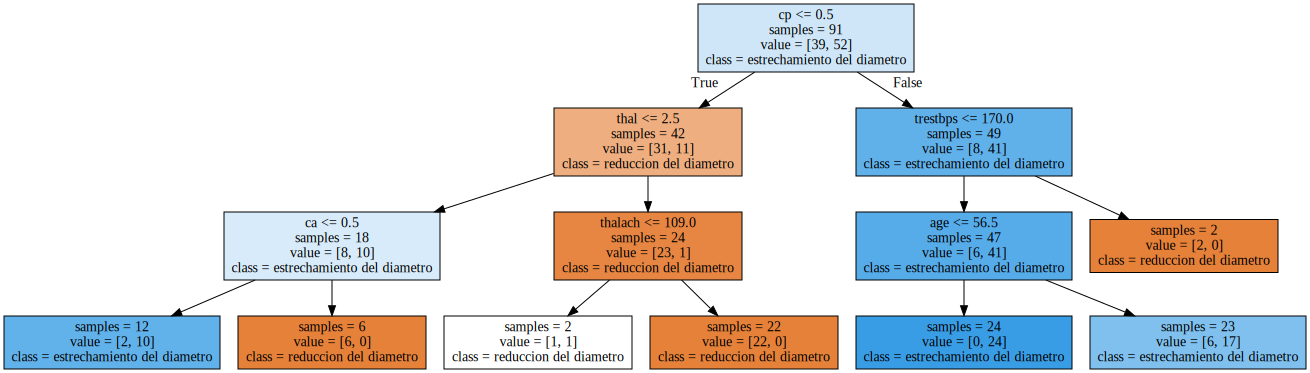

In [17]:
import graphviz
# Dibujando el modelo
export_graphviz(tree, out_file="tree.dot", class_names=["reduccion del diametro", "estrechamiento del diametro"], 
                feature_names=caracterictica, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [18]:
from sklearn.ensemble import AdaBoostClassifier
# Utilizando AdaBoost para aumentar la precisión
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, 
                         learning_rate=1.5, random_state=1)
# Ajustando los datos
ada = ada.fit(X_train, y_train)

In [19]:
ada.score(X_test,y_test)

1.0

In [20]:
ada.score(X_train,y_train)

1.0

In [21]:
ada.feature_importances_

array([0.16198755, 0.01428584, 0.09245185, 0.12248633, 0.15198634,
       0.00876889, 0.02999605, 0.13531908, 0.02648201, 0.10624632,
       0.01921362, 0.06413694, 0.06663919])

In [22]:
imp = pd.DataFrame(zip(caracterictica, ada.feature_importances_), columns = ['Caracteristica', 'Importancia'])
imp = imp.sort_values(by = 'Importancia', ascending = False)
imp.head()

,Caracteristica,Importancia
0,age,0.161988
4,chol,0.151986
7,thalach,0.135319
3,trestbps,0.122486
9,oldpeak,0.106246
